# Loading Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set style for better visuals
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Loading the Dataset

In [ ]:
# Load dataset
df = pd.read_csv("data.csv")

# Display first 5 rows
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1.0,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1.0,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1.0,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1.0,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1.0,0.035490


# Information and Summary

In [ ]:
# Check data types and missing values
print(df.info())

# Check basic statistics
print(df.describe().T)

# Check for missing values
print(df.isnull().sum().sum())  # Total missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 2503 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  2503 non-null   float64
 2    ROA(A) before interest and % after tax                   2503 non-null   float64
 3    ROA(B) before interest and depreciation after tax        2503 non-null   float64
 4    Operating Gross Margin                                   2503 non-null   float64
 5    Realized Sales Gross Margin                              2503 non-null   float64
 6    Operating Profit Rate                                    2503 non-null   float64
 7    Pre-tax net Interest Rate                                2503 non-null   float64
 8    After-tax net Int

# Class Distribution

<ipython-input-4-418be9ff833e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Bankrupt?", data=df, palette="coolwarm")


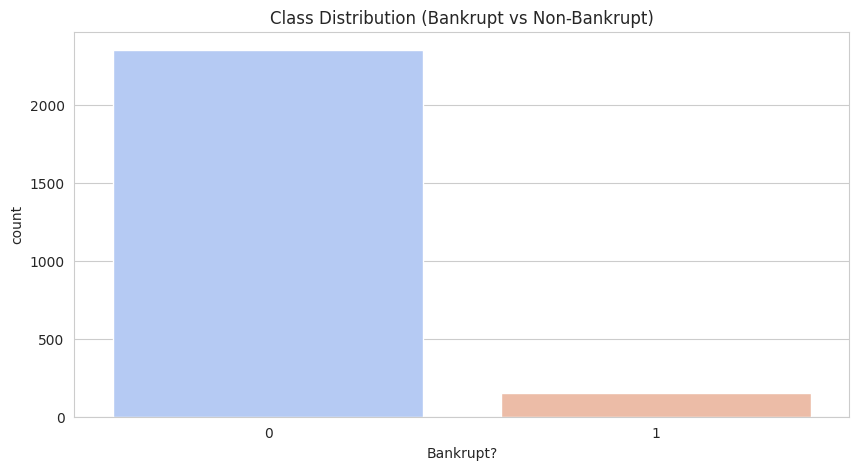

Bankrupt?
0    94.007191
1     5.992809
Name: proportion, dtype: float64


In [ ]:
# Count bankrupt (1) vs non-bankrupt (0) companies
sns.countplot(x="Bankrupt?", data=df, palette="coolwarm")
plt.title("Class Distribution (Bankrupt vs Non-Bankrupt)")
plt.show()

# Percentage of bankrupt companies
bankrupt_ratio = df["Bankrupt?"].value_counts(normalize=True) * 100
print(bankrupt_ratio)

# Correlation Analysis

<ipython-input-5-b4746a80b4fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=corr.index[:10], x=corr.values[:10], palette="coolwarm")


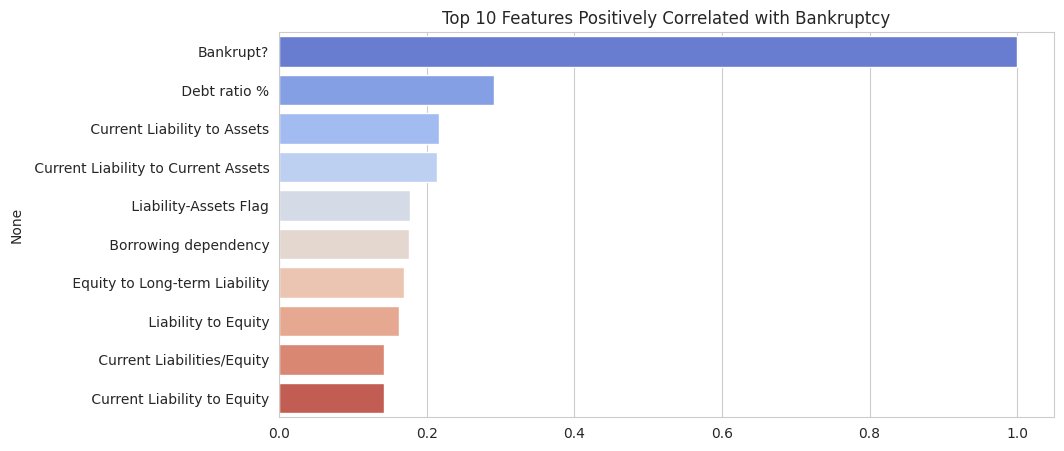

<ipython-input-5-b4746a80b4fa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=corr.index[-10:], x=corr.values[-10:], palette="coolwarm")


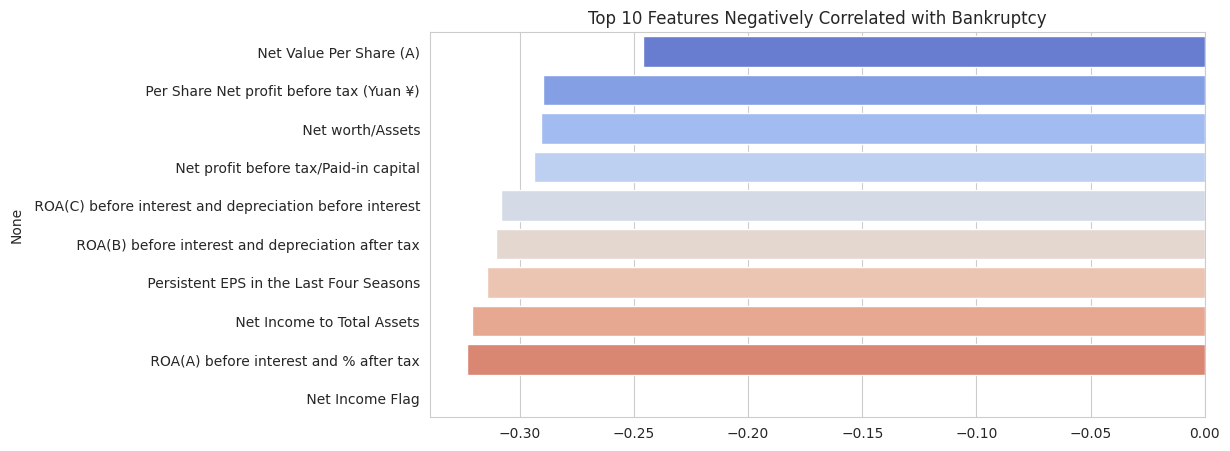

In [ ]:
# Compute correlation with target variable
corr = df.corr()["Bankrupt?"].sort_values(ascending=False)

# Plot top 10 positively & negatively correlated features
plt.figure(figsize=(10, 5))
sns.barplot(y=corr.index[:10], x=corr.values[:10], palette="coolwarm")
plt.title("Top 10 Features Positively Correlated with Bankruptcy")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(y=corr.index[-10:], x=corr.values[-10:], palette="coolwarm")
plt.title("Top 10 Features Negatively Correlated with Bankruptcy")
plt.show()

In [ ]:
# Convert to DataFrame for better readability
corr_df = pd.DataFrame(corr).reset_index()
corr_df.columns = ["Feature", "Correlation with Bankruptcy"]

# Display the correlation table
print(corr_df)

# Save correlation values to CSV
corr_df.to_csv("feature_correlation.csv", index=False)

print("Correlation values saved as 'feature_correlation.csv'.")

                                              Feature  \
0                                           Bankrupt?   
1                                        Debt ratio %   
2                         Current Liability to Assets   
3                 Current Liability to Current Assets   
4                               Liability-Assets Flag   
..                                                ...   
91   ROA(B) before interest and depreciation after...   
92            Persistent EPS in the Last Four Seasons   
93                         Net Income to Total Assets   
94             ROA(A) before interest and % after tax   
95                                    Net Income Flag   

    Correlation with Bankruptcy  
0                      1.000000  
1                      0.290604  
2                      0.216200  
3                      0.213545  
4                      0.177196  
..                          ...  
91                    -0.310565  
92                    -0.314203  
93       

# Data Cleaning

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop duplicates if any exist
df = df.drop_duplicates()

# Confirm duplicates are removed
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


# Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=["Bankrupt?"])
y = df["Bankrupt?"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split completed!")

Data split completed!


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # You can also try "median"
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

# Balancing the dataset

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning for LightGBM using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],  # Limit trees for speed
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 5, 10, 15],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0, 1, 10]
}

# Initialize LightGBM with GPU
lgbm = LGBMClassifier(device='cpu', random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=30,  # Reduce iterations for speed
    scoring='accuracy',
    cv=3,  # Reduce cross-validation folds
    verbose=2,
    n_jobs=-1  # Use all CPU cores
)

# Fit model
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1882, number of negative: 1882
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23738
[LightGBM] [Info] Number of data points in the train set: 3764, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

# Training and evaluating Random Forest, XGBoost, and LightGBM

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize selected models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=len(y_train_resampled)/sum(y_train_resampled), random_state=42),
    "LightGBM": LGBMClassifier(
        subsample = 1.0,
        reg_lambda = 0,
        num_leaves = 40,
        n_estimators = 500,
        min_child_samples = 20,
        max_depth = -1,
        learning_rate = 0.2,
        colsample_bytree = 0.8,
        random_state=42)
}

# Train & Evaluate with Overfitting Check
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)

    # Predictions on training and test sets
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train_resampled, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"\n{name} Performance:")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

    # Classification Report for test set
    print("Test Set Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Overfitting Check
    if train_acc - test_acc > 0.1:  # If training accuracy is much higher than test accuracy
        print(f"Warning: {name} may be overfitting!")


Random Forest Performance:
Training Accuracy: 1.0000
Test Accuracy: 0.9341
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       471
           1       0.45      0.50      0.48        30

    accuracy                           0.93       501
   macro avg       0.71      0.73      0.72       501
weighted avg       0.94      0.93      0.94       501


XGBoost Performance:
Training Accuracy: 1.0000
Test Accuracy: 0.9401
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       471
           1       0.50      0.43      0.46        30

    accuracy                           0.94       501
   macro avg       0.73      0.70      0.72       501
weighted avg       0.94      0.94      0.94       501

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1882, number of ne

# Testing the models

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Load the test data from the CSV file
test_df = pd.read_csv("sample_dataframe.csv")

# Ensure the feature columns match those used in training
feature_columns = X_train_resampled.columns  # Use the same feature set as training
test_df = test_df[feature_columns]  # Select only relevant columns

# Make predictions using the trained models
for name, model in models.items():
    predictions = model.predict(test_df)
    print(f"\n{name} Predictions:")
    print(predictions)  # Output predicted labels


Random Forest Predictions:
[1 1 1 1 0 0 0 0 0 0]

XGBoost Predictions:
[1 1 1 0 0 0 0 0 0 0]

LightGBM Predictions:
[1 1 1 0 0 0 0 0 0 0]


# Classification report for tested data

In [ ]:
# Load the test data from the CSV file
test_df = pd.read_csv("sample_dataframe.csv")

# Ensure y_test_real exists in the dataset
y_test_real = test_df['Bankrupt?']
test_df = test_df.drop(columns=['Bankrupt?'])

for name, model in models.items():
    predictions = model.predict(test_df)
    accuracy = accuracy_score(y_test_real, predictions)

    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test_real, predictions))


Random Forest Accuracy: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10


XGBoost Accuracy: 0.8000
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10


LightGBM Accuracy: 0.8000
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                